# Scaling Methods: Chapter 2

I just really felt like the last notebook was getting crowded, so I decided to move the rest of my analysis over here and change the order of my graphs.

In [1]:
require(ggplot2)
require(readr)
require(reshape2)
require(scales)
require(grid)
require(plyr)

Loading required package: ggplot2
Loading required package: readr
Loading required package: reshape2
Loading required package: scales

Attaching package: ‘scales’

The following object is masked from ‘package:readr’:

    col_factor

Loading required package: grid
Loading required package: plyr


In [2]:
# I am making a function for this dinky little normalization method so I can rank the peak aucs
norm_scale <- function(x){(x - min(x)) / (max(x) - min(x))}

In [3]:
# Load SVM results and find average AUC of series
svm.scale.results = as.data.frame(read_tsv('../results/auc_scale_svm_results.tsv'))
groupings <- svm.scale.results$grouping
svm.scale.results$avg.val <- rowMeans(subset(svm.scale.results, select = -grouping))
svm.scale.results$relative.val <- rescale(svm.scale.results$avg.val)

max(svm.scale.results$avg.val)

svm.scale.results$performance <- ifelse(svm.scale.results$relative.val == 1, 
                                  svm.scale.results$grouping, "Others")
svm.scale.results <- melt(svm.scale.results, 
                    id.vars = c('grouping', 'avg.val', 
                                'performance', 'relative.val'), 
                    variable.name = 'series')

Parsed with column specification:
cols(
  grouping = col_character(),
  `1` = col_double(),
  `2` = col_double(),
  `3` = col_double(),
  `4` = col_double(),
  `5` = col_double(),
  `6` = col_double(),
  `7` = col_double()
)


[1] 0.7397582

series,value,genes,relative
1,0.751457,ERBB2,NaN


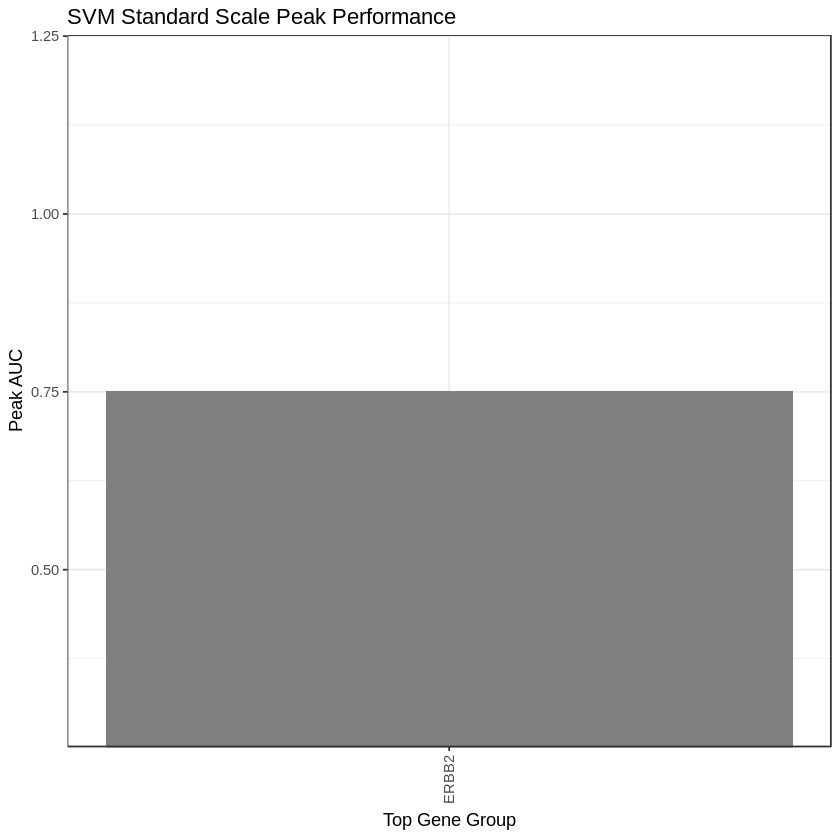

In [4]:
peak.vals <- data.frame(grouping = character(),
                       genes = character(),
                       series = factor(),
                       value = numeric())

# Get the peaks of each grouping and the genes included
for (grouping in groupings){
    temp.df <- svm.scale.results[which(svm.scale.results$grouping == grouping),]
    max.val <- temp.df[which.max(temp.df$value), c('grouping', 'series', 'value')]
    max.val$genes <- paste(unlist(strsplit(grouping, '_'))[1:max(as.numeric(max.val$series))], sep = '', collapse = ', ')
    peak.vals <- rbind(peak.vals, max.val)
    
}
peak.vals <- unique(peak.vals[, c('series', 'value', 'genes')])
peak.vals$genes <- factor(peak.vals$genes, levels = peak.vals$genes[order(peak.vals$value)])

peak.vals$relative <- norm_scale(peak.vals$value)
head(peak.vals)

ghist <- ggplot(peak.vals, aes(x = genes, y = peak.vals$value, fill = relative))
ggsvm.scale.hist <- ghist + geom_bar(stat = 'identity') + theme_bw() + 
                  labs(title = "SVM Standard Scale Peak Performance", x = "Top Gene Group", y = "Peak AUC") +
                  guides(fill = F) +
                  ylim(0, 1) +
                  scale_fill_gradient(low = '#f7fcb9', high = '#31a354') +
                  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 0)) +
                  coord_cartesian(ylim = c(min(peak.vals$value), max(peak.vals$value)))

ggsvm.scale.hist

#ggsave('peak_performance[error].pdf', gghist, device = 'pdf')

In [5]:
# Load SVM results and find average AUC of series
svm.robust.results = as.data.frame(read_tsv('../results/auc_robust_svm_results.tsv'))
groupings <- svm.robust.results$grouping
svm.robust.results$avg.val <- rowMeans(subset(svm.robust.results, select = -grouping))
svm.robust.results$relative.val <- rescale(svm.robust.results$avg.val)

max(svm.robust.results$avg.val)

svm.robust.results$performance <- ifelse(svm.robust.results$relative.val == 1, 
                                  svm.robust.results$grouping, "Others")
svm.robust.results <- melt(svm.robust.results, 
                    id.vars = c('grouping', 'avg.val', 
                                'performance', 'relative.val'), 
                    variable.name = 'series')

Parsed with column specification:
cols(
  grouping = col_character(),
  `1` = col_double(),
  `2` = col_double(),
  `3` = col_double(),
  `4` = col_double(),
  `5` = col_double(),
  `6` = col_double(),
  `7` = col_double()
)


[1] 0.7455463

,series,value,genes,relative
1,1,0.7590138,ERBB2,0.00000000
1729,3,0.7600694,"ERBB2, IGF1R, FGF1",0.52824579
2467,4,0.7610122,"ERBB2, IGF1R, FGF1, IGF1",1.00000000
1777,3,0.7591940,"ERBB2, IGF1R, IGF1",0.09018831
2509,4,0.7610122,"ERBB2, IGF1R, IGF1, FGF1",1.00000000
1849,3,0.7600694,"ERBB2, FGF1, IGF1R",0.52824579


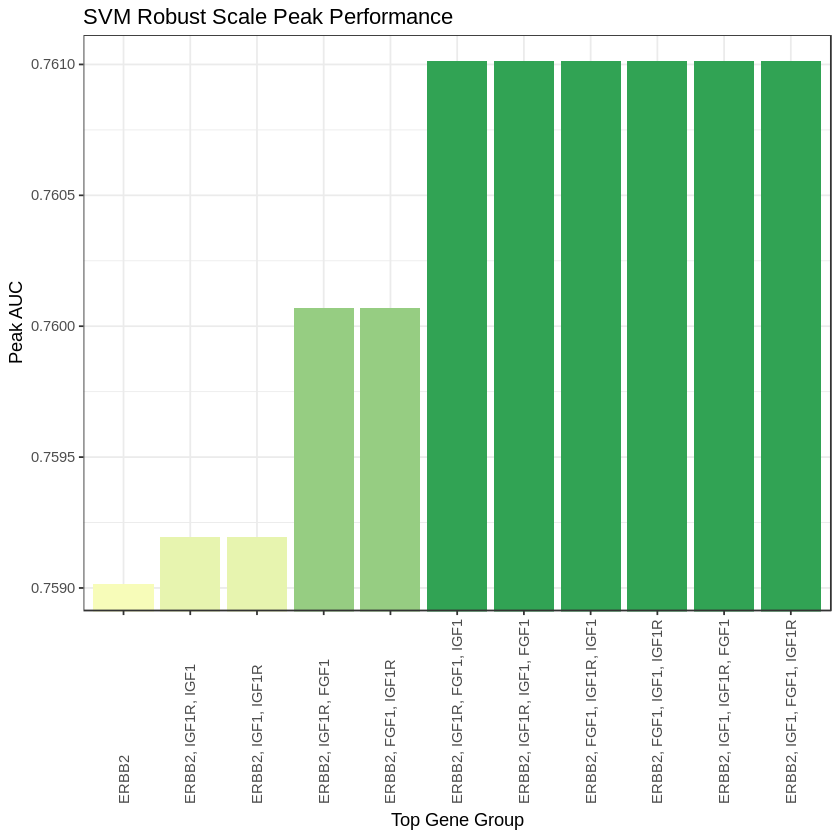

In [6]:
peak.vals <- data.frame(grouping = character(),
                       genes = character(),
                       series = factor(),
                       value = numeric())

# Get the peaks of each grouping and the genes included
for (grouping in groupings){
    temp.df <- svm.robust.results[which(svm.robust.results$grouping == grouping),]
    max.val <- temp.df[which.max(temp.df$value), c('grouping', 'series', 'value')]
    max.val$genes <- paste(unlist(strsplit(grouping, '_'))[1:max(as.numeric(max.val$series))], sep = '', collapse = ', ')
    peak.vals <- rbind(peak.vals, max.val)
    
}
peak.vals <- unique(peak.vals[, c('series', 'value', 'genes')])
peak.vals$genes <- factor(peak.vals$genes, levels = peak.vals$genes[order(peak.vals$value)])

peak.vals$relative <- norm_scale(peak.vals$value)
head(peak.vals)

ghist <- ggplot(peak.vals, aes(x = genes, y = peak.vals$value, fill = relative))
ggsvm.robust.hist <- ghist + geom_bar(stat = 'identity') + theme_bw() + 
                  labs(title = "SVM Robust Scale Peak Performance", x = "Top Gene Group", y = "Peak AUC") +
                  guides(fill = F) +
                  ylim(0, 1) +
                  scale_fill_gradient(low = '#f7fcb9', high = '#31a354') +
                  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 0)) +
                  coord_cartesian(ylim = c(min(peak.vals$value), max(peak.vals$value)))

ggsvm.robust.hist

#ggsave('peak_performance[error].pdf', gghist, device = 'pdf')

In [7]:
# Load SVM results and find average AUC of series
svm.quantile.results = as.data.frame(read_tsv('../results/auc_quantile_svm_results.tsv'))
groupings <- svm.quantile.results$grouping
svm.quantile.results$avg.val <- rowMeans(subset(svm.quantile.results, select = -grouping))
svm.quantile.results$relative.val <- rescale(svm.quantile.results$avg.val)

max(svm.quantile.results$avg.val)

svm.quantile.results$performance <- ifelse(svm.quantile.results$relative.val == 1, 
                                  svm.quantile.results$grouping, "Others")
svm.quantile.results <- melt(svm.quantile.results, 
                    id.vars = c('grouping', 'avg.val', 
                                'performance', 'relative.val'), 
                    variable.name = 'series')

Parsed with column specification:
cols(
  grouping = col_character(),
  `1` = col_double(),
  `2` = col_double(),
  `3` = col_double(),
  `4` = col_double(),
  `5` = col_double(),
  `6` = col_double(),
  `7` = col_double()
)


[1] 0.7187028

series,value,genes,relative
1,0.7619872,ERBB2,NaN


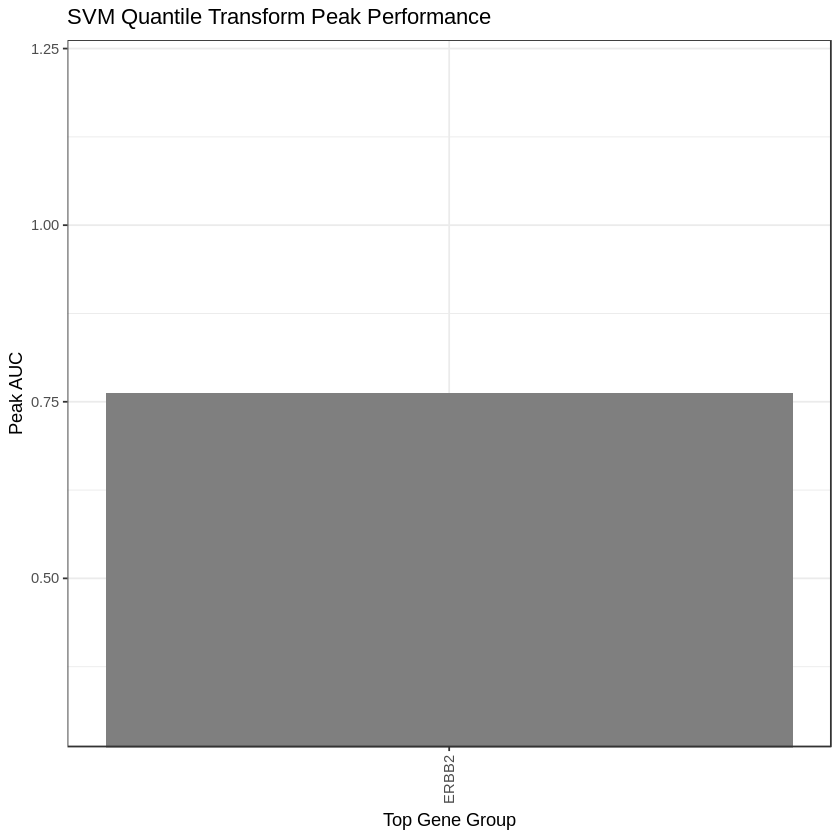

In [8]:
peak.vals <- data.frame(grouping = character(),
                       genes = character(),
                       series = factor(),
                       value = numeric())

# Get the peaks of each grouping and the genes included
for (grouping in groupings){
    temp.df <- svm.quantile.results[which(svm.quantile.results$grouping == grouping),]
    max.val <- temp.df[which.max(temp.df$value), c('grouping', 'series', 'value')]
    max.val$genes <- paste(unlist(strsplit(grouping, '_'))[1:max(as.numeric(max.val$series))], sep = '', collapse = ', ')
    peak.vals <- rbind(peak.vals, max.val)
    
}
peak.vals <- unique(peak.vals[, c('series', 'value', 'genes')])
peak.vals$genes <- factor(peak.vals$genes, levels = peak.vals$genes[order(peak.vals$value)])

peak.vals$relative <- norm_scale(peak.vals$value)
head(peak.vals)

ghist <- ggplot(peak.vals, aes(x = genes, y = peak.vals$value, fill = relative))
ggsvm.quantile.hist <- ghist + geom_bar(stat = 'identity') + theme_bw() + 
                  labs(title = "SVM Quantile Transform Peak Performance", x = "Top Gene Group", y = "Peak AUC") +
                  guides(fill = F) +
                  ylim(0, 1) +
                  scale_fill_gradient(low = '#f7fcb9', high = '#31a354') +
                  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 0)) +
                  coord_cartesian(ylim = c(min(peak.vals$value), max(peak.vals$value)))

ggsvm.quantile.hist

#ggsave('peak_performance[error].pdf', gghist, device = 'pdf')

In [9]:
# Load SVM results and find average AUC of series
svm.norm.results = as.data.frame(read_tsv('../results/auc_norm_quan_svm_results.tsv'))
groupings <- svm.norm.results$grouping
svm.norm.results$avg.val <- rowMeans(subset(svm.norm.results, select = -grouping))
svm.norm.results$relative.val <- rescale(svm.norm.results$avg.val)

max(svm.norm.results$avg.val)

svm.norm.results$performance <- ifelse(svm.norm.results$relative.val == 1, 
                                  svm.norm.results$grouping, "Others")
svm.norm.results <- melt(svm.norm.results, 
                    id.vars = c('grouping', 'avg.val', 
                                'performance', 'relative.val'), 
                    variable.name = 'series')

Parsed with column specification:
cols(
  grouping = col_character(),
  `1` = col_double(),
  `2` = col_double(),
  `3` = col_double(),
  `4` = col_double(),
  `5` = col_double(),
  `6` = col_double(),
  `7` = col_double()
)


[1] 0.5304451

series,value,genes,relative
1,0.7131158,ERBB2,NaN


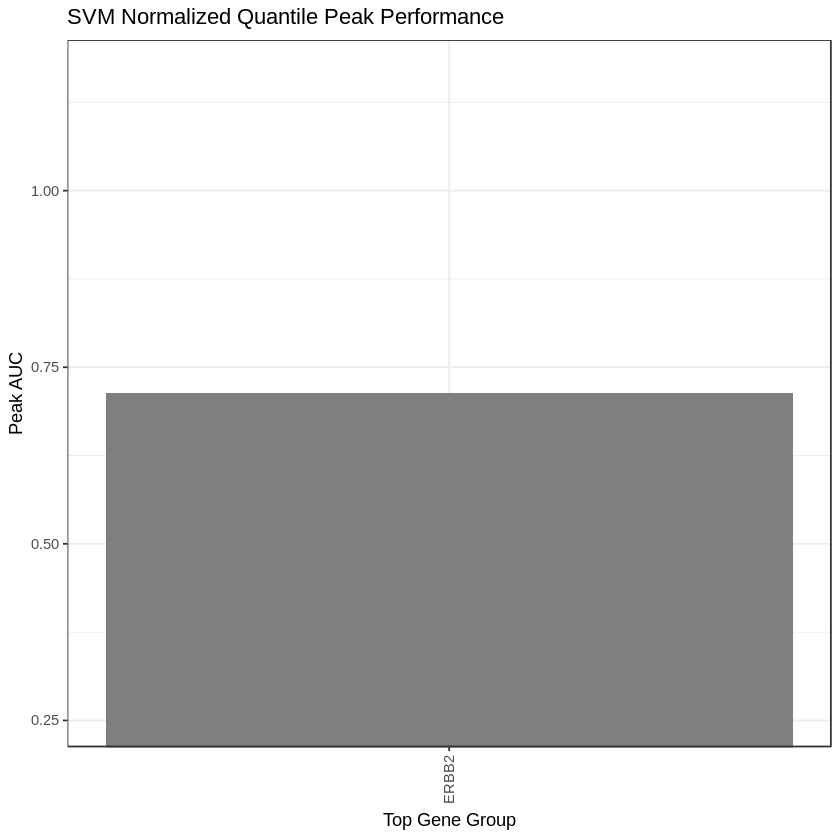

In [10]:
peak.vals <- data.frame(grouping = character(),
                       genes = character(),
                       series = factor(),
                       value = numeric())

# Get the peaks of each grouping and the genes included
for (grouping in groupings){
    temp.df <- svm.norm.results[which(svm.norm.results$grouping == grouping),]
    max.val <- temp.df[which.max(temp.df$value), c('grouping', 'series', 'value')]
    max.val$genes <- paste(unlist(strsplit(grouping, '_'))[1:max(as.numeric(max.val$series))], sep = '', collapse = ', ')
    peak.vals <- rbind(peak.vals, max.val)
    
}
peak.vals <- unique(peak.vals[, c('series', 'value', 'genes')])
peak.vals$genes <- factor(peak.vals$genes, levels = peak.vals$genes[order(peak.vals$value)])

peak.vals$relative <- norm_scale(peak.vals$value)
head(peak.vals)

ghist <- ggplot(peak.vals, aes(x = genes, y = peak.vals$value, fill = relative))
ggsvm.norm.hist <- ghist + geom_bar(stat = 'identity') + theme_bw() + 
                  labs(title = "SVM Normalized Quantile Peak Performance", x = "Top Gene Group", y = "Peak AUC") +
                  guides(fill = F) +
                  ylim(0, 1) +
                  scale_fill_gradient(low = '#f7fcb9', high = '#31a354') +
                  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 0)) +
                  coord_cartesian(ylim = c(min(peak.vals$value), max(peak.vals$value)))

ggsvm.norm.hist

#ggsave('peak_performance[error].pdf', gghist, device = 'pdf')

In [11]:
# Load SVM results and find average AUC of series
svm.vst.results = as.data.frame(read_tsv('../results/auc_vsd_svm_results.tsv'))
groupings <- svm.vst.results$grouping
svm.vst.results$avg.val <- rowMeans(subset(svm.vst.results, select = -grouping))
svm.vst.results$relative.val <- rescale(svm.vst.results$avg.val)

max(svm.vst.results$avg.val)

svm.vst.results$performance <- ifelse(svm.vst.results$relative.val == 1, 
                                  svm.vst.results$grouping, "Others")
svm.vst.results <- melt(svm.vst.results, 
                    id.vars = c('grouping', 'avg.val', 
                                'performance', 'relative.val'), 
                    variable.name = 'series')

Parsed with column specification:
cols(
  grouping = col_character(),
  `1` = col_double(),
  `2` = col_double(),
  `3` = col_double(),
  `4` = col_double(),
  `5` = col_double(),
  `6` = col_double(),
  `7` = col_double()
)


[1] 0.5304451

series,value,genes,relative
1,0.7131158,ERBB2,NaN


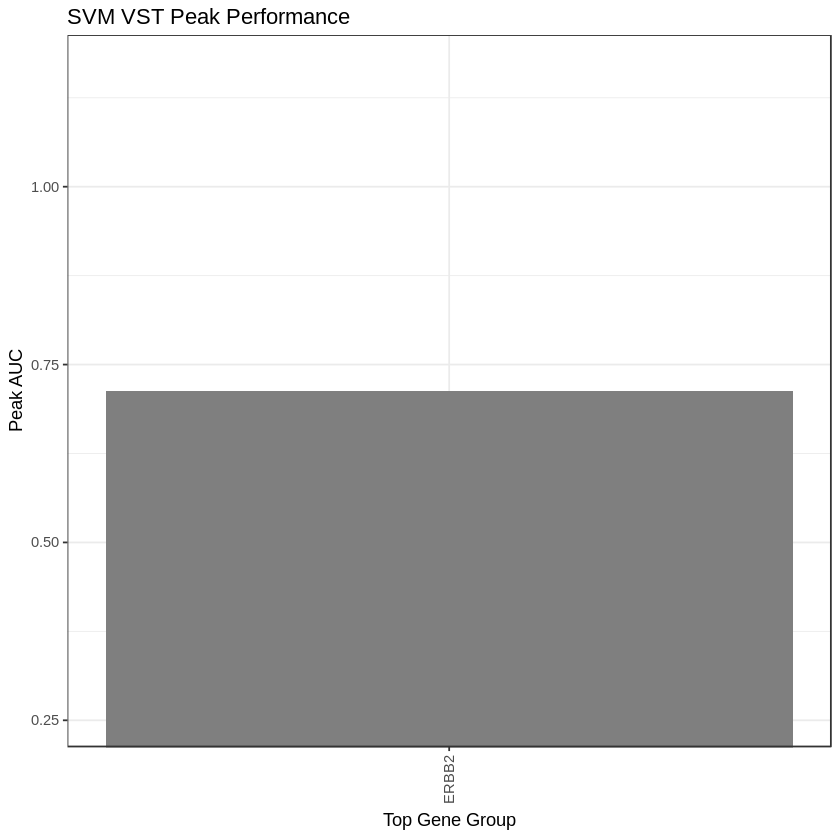

In [12]:
peak.vals <- data.frame(grouping = character(),
                       genes = character(),
                       series = factor(),
                       value = numeric())

# Get the peaks of each grouping and the genes included
for (grouping in groupings){
    temp.df <- svm.vst.results[which(svm.vst.results$grouping == grouping),]
    max.val <- temp.df[which.max(temp.df$value), c('grouping', 'series', 'value')]
    max.val$genes <- paste(unlist(strsplit(grouping, '_'))[1:max(as.numeric(max.val$series))], sep = '', collapse = ', ')
    peak.vals <- rbind(peak.vals, max.val)
    
}
peak.vals <- unique(peak.vals[, c('series', 'value', 'genes')])
peak.vals$genes <- factor(peak.vals$genes, levels = peak.vals$genes[order(peak.vals$value)])

peak.vals$relative <- norm_scale(peak.vals$value)
head(peak.vals)

ghist <- ggplot(peak.vals, aes(x = genes, y = peak.vals$value, fill = relative))
ggsvm.vst.hist <- ghist + geom_bar(stat = 'identity') + theme_bw() + 
                  labs(title = "SVM VST Peak Performance", x = "Top Gene Group", y = "Peak AUC") +
                  guides(fill = F) +
                  ylim(0, 1) +
                  scale_fill_gradient(low = '#f7fcb9', high = '#31a354') +
                  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 0)) +
                  coord_cartesian(ylim = c(min(peak.vals$value), max(peak.vals$value)))

ggsvm.vst.hist

#ggsave('peak_performance[error].pdf', gghist, device = 'pdf')

In [13]:
# Load RandomForest results and find average AUC of series
rf.scale.results = as.data.frame(read_tsv('../results/auc_scale_rf_results.tsv'))
groupings <- rf.scale.results$grouping
rf.scale.results$avg.val <- rowMeans(subset(rf.scale.results, select = -grouping))
rf.scale.results$relative.val <- rescale(rf.scale.results$avg.val)

max(rf.scale.results$avg.val)

rf.scale.results$performance <- ifelse(rf.scale.results$relative.val == 1, 
                                 rf.scale.results$grouping, "Others")
rf.scale.results <- melt(rf.scale.results, 
                   id.vars = c('grouping', 'avg.val', 
                               'performance', 'relative.val'), 
                   variable.name = 'series')

Parsed with column specification:
cols(
  grouping = col_character(),
  `1` = col_double(),
  `2` = col_double(),
  `3` = col_double(),
  `4` = col_double(),
  `5` = col_double(),
  `6` = col_double(),
  `7` = col_double()
)


[1] 0.7501834

,series,value,genes,relative
3601,6,0.7585705,"ERBB2, FGFR1, EGFR, IGF1R, FGF1, EGF",0.6174016
2882,5,0.7492445,"ERBB2, FGFR1, EGFR, IGF1R, FGF1",0.3205225
3603,6,0.7598906,"ERBB2, FGFR1, EGFR, IGF1R, EGF, FGF1",0.6594239
1444,3,0.7487655,"ERBB2, FGFR1, EGFR",0.3052725
4325,7,0.7537219,"ERBB2, FGFR1, EGFR, IGF1R, IGF1, FGF1, EGF",0.4630532
2887,5,0.7594333,"ERBB2, FGFR1, EGFR, FGF1, IGF1R",0.6448674


Saving 30 x 6.67 in image


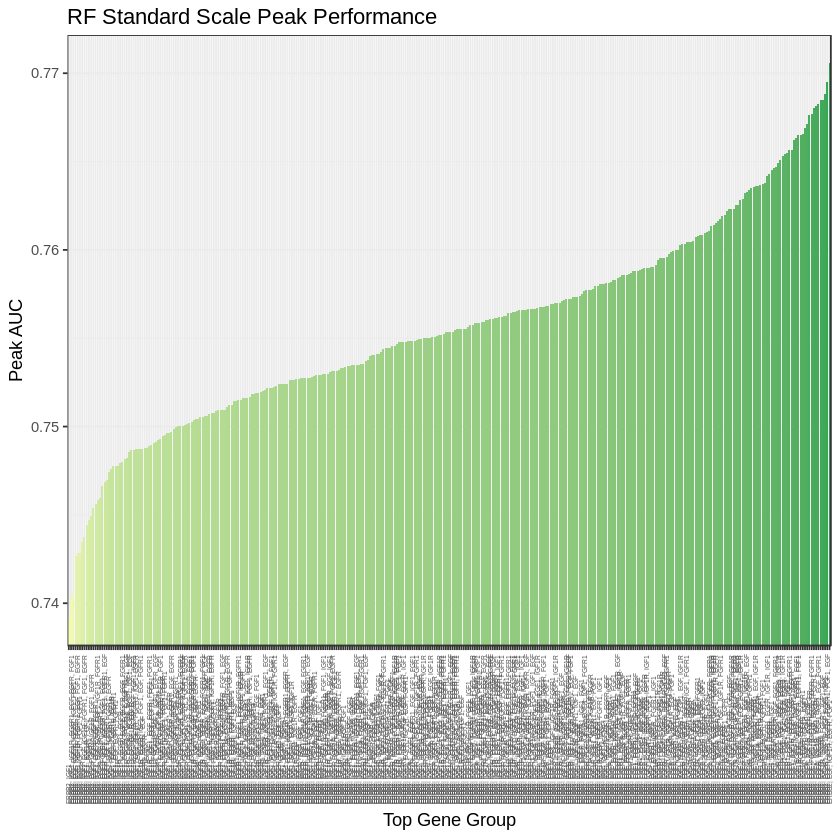

In [14]:
peak.vals <- data.frame(grouping = character(),
                       genes = character(),
                       series = factor(),
                       value = numeric())

# Get the peaks of each grouping and the genes included
for (grouping in groupings){
    temp.df <- rf.scale.results[which(rf.scale.results$grouping == grouping),]
    max.val <- temp.df[which.max(temp.df$value), c('grouping', 'series', 'value')]
    max.val$genes <- paste(unlist(strsplit(grouping, '_'))[1:max(as.numeric(max.val$series))], sep = '', collapse = ', ')
    peak.vals <- rbind(peak.vals, max.val)
    
}
peak.vals <- unique(peak.vals[, c('series', 'value', 'genes')])
peak.vals$genes <- factor(peak.vals$genes, levels = peak.vals$genes[order(peak.vals$value)])

peak.vals$relative <- norm_scale(peak.vals$value)
head(peak.vals)

ghist <- ggplot(peak.vals, aes(x = genes, y = peak.vals$value, fill = relative))
ggrf.scale.hist <- ghist + geom_bar(stat = 'identity') + theme_bw() + 
                  labs(title = "RF Standard Scale Peak Performance", x = "Top Gene Group", y = "Peak AUC") +
                  guides(fill = F) +
                  ylim(0, 1) +
                  scale_fill_gradient(low = '#f7fcb9', high = '#31a354') +
                  theme(axis.text.x = element_text(angle = 90, size = 4, vjust = 0.5, hjust = 0)) +
                  coord_cartesian(ylim = c(min(peak.vals$value), max(peak.vals$value)))

ggrf.scale.hist

ggsave('peak_performance_scale.pdf', ggrf.scale.hist, device = 'pdf', width = 30)

In [15]:
# Load RandomForest results and find average AUC of series
rf.robust.results = as.data.frame(read_tsv('../results/auc_robust_rf_results.tsv'))
groupings <- rf.robust.results$grouping
rf.robust.results$avg.val <- rowMeans(subset(rf.robust.results, select = -grouping))
rf.robust.results$relative.val <- rescale(rf.robust.results$avg.val)

max(rf.robust.results$avg.val)

rf.robust.results$performance <- ifelse(rf.robust.results$relative.val == 1, 
                                 rf.robust.results$grouping, "Others")
rf.robust.results <- melt(rf.robust.results, 
                   id.vars = c('grouping', 'avg.val', 
                               'performance', 'relative.val'), 
                   variable.name = 'series')

Parsed with column specification:
cols(
  grouping = col_character(),
  `1` = col_double(),
  `2` = col_double(),
  `3` = col_double(),
  `4` = col_double(),
  `5` = col_double(),
  `6` = col_double(),
  `7` = col_double()
)


[1] 0.7579137

,series,value,genes,relative
2881,5,0.7538560,"ERBB2, FGFR1, EGFR, IGF1R, FGF1",0.1760818
3602,6,0.7601565,"ERBB2, FGFR1, EGFR, IGF1R, FGF1, IGF1",0.4091815
2883,5,0.7669178,"ERBB2, FGFR1, EGFR, IGF1R, EGF",0.6593314
4325,7,0.7614268,"ERBB2, FGFR1, EGFR, IGF1R, IGF1, FGF1, EGF",0.4561788
2886,5,0.7603872,"ERBB2, FGFR1, EGFR, IGF1R, IGF1",0.4177181
2887,5,0.7650491,"ERBB2, FGFR1, EGFR, FGF1, IGF1R",0.5901957


Saving 30 x 6.67 in image


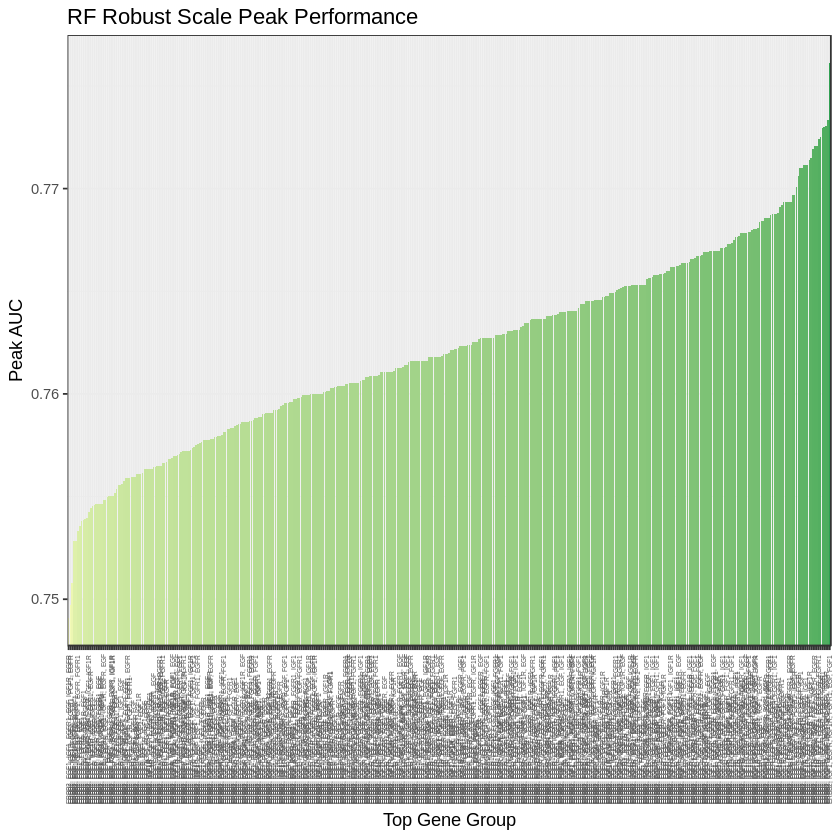

In [16]:
peak.vals <- data.frame(grouping = character(),
                       genes = character(),
                       series = factor(),
                       value = numeric())

# Get the peaks of each grouping and the genes included
for (grouping in groupings){
    temp.df <- rf.robust.results[which(rf.robust.results$grouping == grouping),]
    max.val <- temp.df[which.max(temp.df$value), c('grouping', 'series', 'value')]
    max.val$genes <- paste(unlist(strsplit(grouping, '_'))[1:max(as.numeric(max.val$series))], sep = '', collapse = ', ')
    peak.vals <- rbind(peak.vals, max.val)
    
}
peak.vals <- unique(peak.vals[, c('series', 'value', 'genes')])
peak.vals$genes <- factor(peak.vals$genes, levels = peak.vals$genes[order(peak.vals$value)])

peak.vals$relative <- norm_scale(peak.vals$value)
head(peak.vals)

ghist <- ggplot(peak.vals, aes(x = genes, y = peak.vals$value, fill = relative))
ggrf.robust.hist <- ghist + geom_bar(stat = 'identity') + theme_bw() + 
                  labs(title = "RF Robust Scale Peak Performance", x = "Top Gene Group", y = "Peak AUC") +
                  guides(fill = F) +
                  ylim(0, 1) +
                  scale_fill_gradient(low = '#f7fcb9', high = '#31a354') +
                  theme(axis.text.x = element_text(angle = 90, size = 4, vjust = 0.5, hjust = 0)) +
                  coord_cartesian(ylim = c(min(peak.vals$value), max(peak.vals$value)))

ggrf.robust.hist

ggsave('peak_performance_scale.pdf', ggrf.robust.hist, device = 'pdf', width = 30)

In [17]:
# Load RandomForest results and find average AUC of series
rf.quantile.results = as.data.frame(read_tsv('../results/auc_quantile_rf_results.tsv'))
groupings <- rf.quantile.results$grouping
rf.quantile.results$avg.val <- rowMeans(subset(rf.quantile.results, select = -grouping))
rf.quantile.results$relative.val <- rescale(rf.quantile.results$avg.val)

max(rf.quantile.results$avg.val)

rf.quantile.results$performance <- ifelse(rf.quantile.results$relative.val == 1, 
                                 rf.quantile.results$grouping, "Others")
rf.quantile.results <- melt(rf.quantile.results, 
                   id.vars = c('grouping', 'avg.val', 
                               'performance', 'relative.val'), 
                   variable.name = 'series')

Parsed with column specification:
cols(
  grouping = col_character(),
  `1` = col_double(),
  `2` = col_double(),
  `3` = col_double(),
  `4` = col_double(),
  `5` = col_double(),
  `6` = col_double(),
  `7` = col_double()
)


[1] 0.7418426

,series,value,genes,relative
2161,4,0.7445476,"ERBB2, FGFR1, EGFR, IGF1R",0.3647447
2883,5,0.7588622,"ERBB2, FGFR1, EGFR, IGF1R, EGF",0.9913411
2885,5,0.7506306,"ERBB2, FGFR1, EGFR, IGF1R, IGF1",0.6310180
3607,6,0.7500358,"ERBB2, FGFR1, EGFR, FGF1, IGF1R, EGF",0.6049818
2888,5,0.7454398,"ERBB2, FGFR1, EGFR, FGF1, IGF1R",0.4038017
3609,6,0.7491098,"ERBB2, FGFR1, EGFR, FGF1, EGF, IGF1R",0.5644510


Saving 30 x 6.67 in image


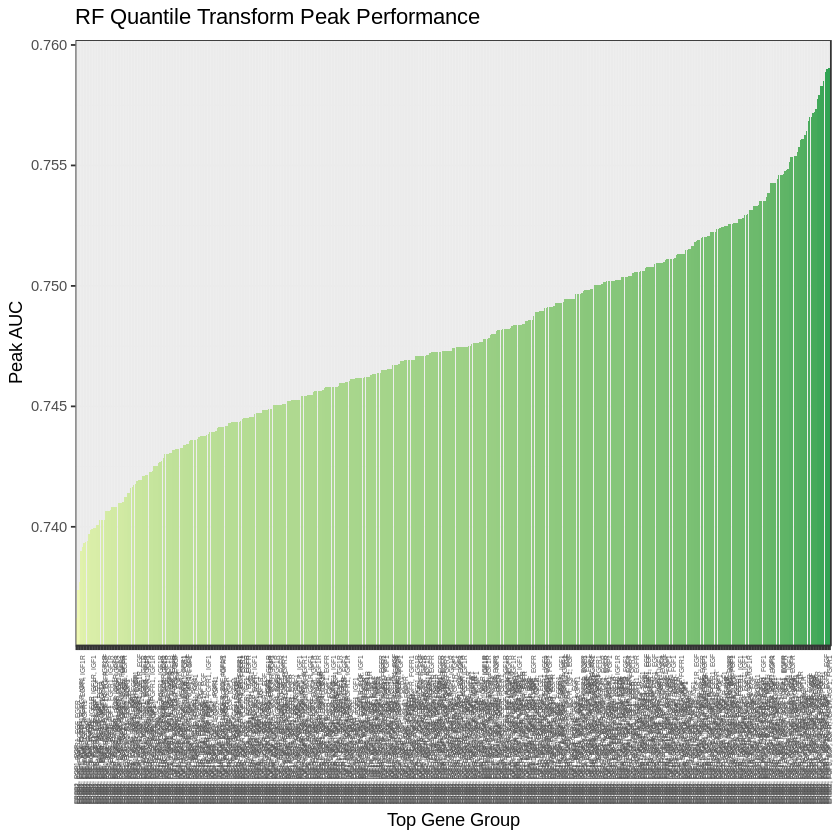

In [18]:
peak.vals <- data.frame(grouping = character(),
                       genes = character(),
                       series = factor(),
                       value = numeric())

# Get the peaks of each grouping and the genes included
for (grouping in groupings){
    temp.df <- rf.quantile.results[which(rf.quantile.results$grouping == grouping),]
    max.val <- temp.df[which.max(temp.df$value), c('grouping', 'series', 'value')]
    max.val$genes <- paste(unlist(strsplit(grouping, '_'))[1:max(as.numeric(max.val$series))], sep = '', collapse = ', ')
    peak.vals <- rbind(peak.vals, max.val)
    
}
peak.vals <- unique(peak.vals[, c('series', 'value', 'genes')])
peak.vals$genes <- factor(peak.vals$genes, levels = peak.vals$genes[order(peak.vals$value)])

peak.vals$relative <- norm_scale(peak.vals$value)
head(peak.vals)

ghist <- ggplot(peak.vals, aes(x = genes, y = peak.vals$value, fill = relative))
ggrf.quantile.hist <- ghist + geom_bar(stat = 'identity') + theme_bw() + 
                  labs(title = "RF Quantile Transform Peak Performance", x = "Top Gene Group", y = "Peak AUC") +
                  guides(fill = F) +
                  ylim(0, 1) +
                  scale_fill_gradient(low = '#f7fcb9', high = '#31a354') +
                  theme(axis.text.x = element_text(angle = 90, size = 4, vjust = 0.5, hjust = 0)) +
                  coord_cartesian(ylim = c(min(peak.vals$value), max(peak.vals$value)))

ggrf.quantile.hist

ggsave('peak_performance_scale.pdf', ggrf.quantile.hist, device = 'pdf', width = 30)

In [19]:
# Load RandomForest results and find average AUC of series
rf.norm.results = as.data.frame(read_tsv('../results/auc_norm_quan_rf_results.tsv'))
groupings <- rf.norm.results$grouping
rf.norm.results$avg.val <- rowMeans(subset(rf.norm.results, select = -grouping))
rf.norm.results$relative.val <- rescale(rf.norm.results$avg.val)

max(rf.norm.results$avg.val)

rf.norm.results$performance <- ifelse(rf.norm.results$relative.val == 1, 
                                 rf.norm.results$grouping, "Others")
rf.norm.results <- melt(rf.norm.results, 
                   id.vars = c('grouping', 'avg.val', 
                               'performance', 'relative.val'), 
                   variable.name = 'series')

Parsed with column specification:
cols(
  grouping = col_character(),
  `1` = col_double(),
  `2` = col_double(),
  `3` = col_double(),
  `4` = col_double(),
  `5` = col_double(),
  `6` = col_double(),
  `7` = col_double()
)


[1] 0.7609473

,series,value,genes,relative
3601,6,0.7646325,"ERBB2, FGFR1, EGFR, IGF1R, FGF1, EGF",0.4679626
4322,7,0.7683196,"ERBB2, FGFR1, EGFR, IGF1R, FGF1, IGF1, EGF",0.5957147
2883,5,0.7656530,"ERBB2, FGFR1, EGFR, IGF1R, EGF",0.5033202
2165,4,0.7634537,"ERBB2, FGFR1, EGFR, IGF1R",0.4271205
2887,5,0.7583908,"ERBB2, FGFR1, EGFR, FGF1, IGF1R",0.2516992
3608,6,0.7586749,"ERBB2, FGFR1, EGFR, FGF1, IGF1R, IGF1",0.2615425


Saving 30 x 6.67 in image


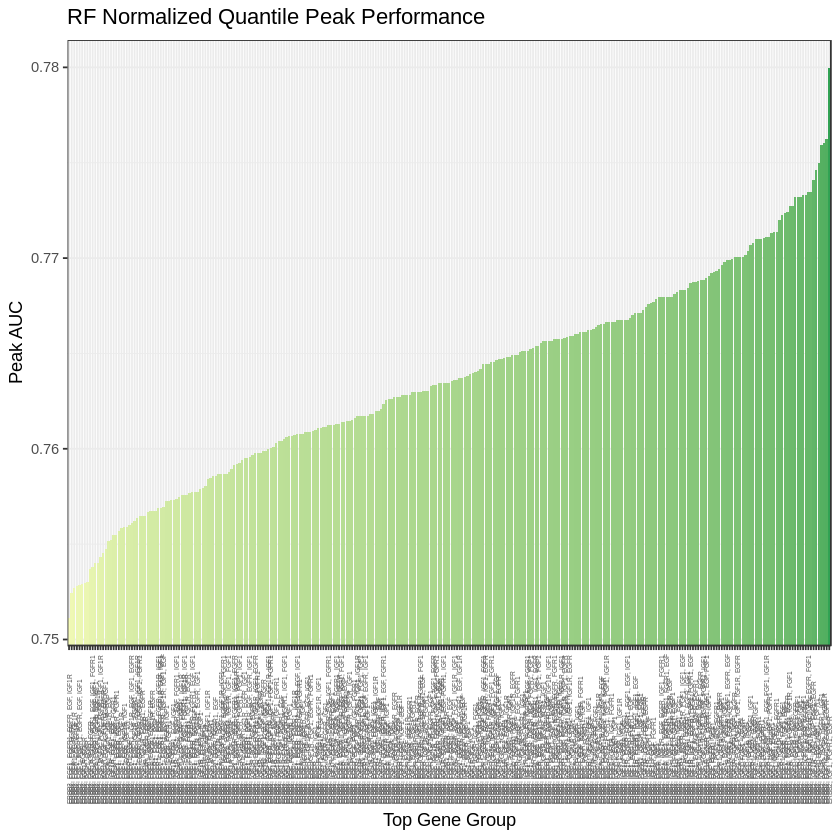

In [20]:
peak.vals <- data.frame(grouping = character(),
                       genes = character(),
                       series = factor(),
                       value = numeric())

# Get the peaks of each grouping and the genes included
for (grouping in groupings){
    temp.df <- rf.norm.results[which(rf.norm.results$grouping == grouping),]
    max.val <- temp.df[which.max(temp.df$value), c('grouping', 'series', 'value')]
    max.val$genes <- paste(unlist(strsplit(grouping, '_'))[1:max(as.numeric(max.val$series))], sep = '', collapse = ', ')
    peak.vals <- rbind(peak.vals, max.val)
    
}
peak.vals <- unique(peak.vals[, c('series', 'value', 'genes')])
peak.vals$genes <- factor(peak.vals$genes, levels = peak.vals$genes[order(peak.vals$value)])

peak.vals$relative <- norm_scale(peak.vals$value)
head(peak.vals)

ghist <- ggplot(peak.vals, aes(x = genes, y = peak.vals$value, fill = relative))
ggrf.norm.hist <- ghist + geom_bar(stat = 'identity') + theme_bw() + 
                  labs(title = "RF Normalized Quantile Peak Performance", x = "Top Gene Group", y = "Peak AUC") +
                  guides(fill = F) +
                  ylim(0, 1) +
                  scale_fill_gradient(low = '#f7fcb9', high = '#31a354') +
                  theme(axis.text.x = element_text(angle = 90, size = 4, vjust = 0.5, hjust = 0)) +
                  coord_cartesian(ylim = c(min(peak.vals$value), max(peak.vals$value)))

ggrf.norm.hist

ggsave('peak_performance_scale.pdf', ggrf.norm.hist, device = 'pdf', width = 30)

In [21]:
# Load RandomForest results and find average AUC of series
rf.vst.results = as.data.frame(read_tsv('../results/auc_vsd_rf_results.tsv'))
groupings <- rf.vst.results$grouping
rf.vst.results$avg.val <- rowMeans(subset(rf.vst.results, select = -grouping))
rf.vst.results$relative.val <- rescale(rf.vst.results$avg.val)

max(rf.vst.results$avg.val)

rf.vst.results$performance <- ifelse(rf.vst.results$relative.val == 1, 
                                 rf.vst.results$grouping, "Others")
rf.vst.results <- melt(rf.vst.results, 
                   id.vars = c('grouping', 'avg.val', 
                               'performance', 'relative.val'), 
                   variable.name = 'series')

Parsed with column specification:
cols(
  grouping = col_character(),
  `1` = col_double(),
  `2` = col_double(),
  `3` = col_double(),
  `4` = col_double(),
  `5` = col_double(),
  `6` = col_double(),
  `7` = col_double()
)


[1] 0.7552957

,series,value,genes,relative
2881,5,0.7590476,"ERBB2, FGFR1, EGFR, IGF1R, FGF1",0.3401311
2883,5,0.7578522,"ERBB2, FGFR1, EGFR, IGF1R, EGF",0.2967598
4325,7,0.7589363,"ERBB2, FGFR1, EGFR, IGF1R, IGF1, FGF1, EGF",0.3360903
3606,6,0.7629787,"ERBB2, FGFR1, EGFR, IGF1R, IGF1, EGF",0.4827523
4327,7,0.7550659,"ERBB2, FGFR1, EGFR, FGF1, IGF1R, EGF, IGF1",0.1956692
3608,6,0.7573848,"ERBB2, FGFR1, EGFR, FGF1, IGF1R, IGF1",0.2798021


Saving 30 x 6.67 in image


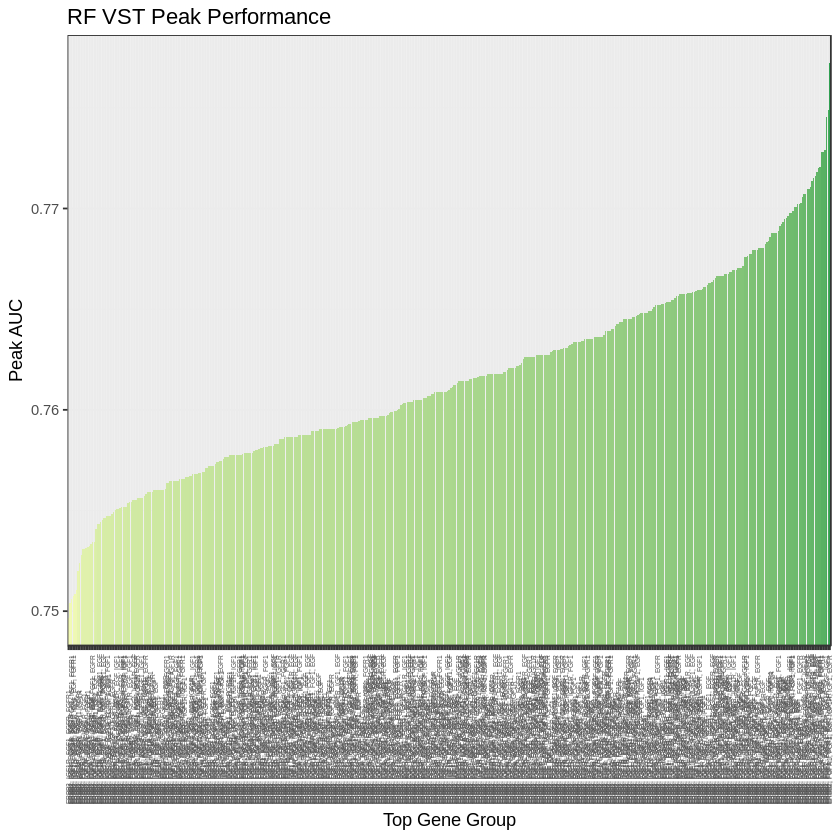

In [22]:
peak.vals <- data.frame(grouping = character(),
                       genes = character(),
                       series = factor(),
                       value = numeric())

# Get the peaks of each grouping and the genes included
for (grouping in groupings){
    temp.df <- rf.vst.results[which(rf.vst.results$grouping == grouping),]
    max.val <- temp.df[which.max(temp.df$value), c('grouping', 'series', 'value')]
    max.val$genes <- paste(unlist(strsplit(grouping, '_'))[1:max(as.numeric(max.val$series))], sep = '', collapse = ', ')
    peak.vals <- rbind(peak.vals, max.val)
    
}
peak.vals <- unique(peak.vals[, c('series', 'value', 'genes')])
peak.vals$genes <- factor(peak.vals$genes, levels = peak.vals$genes[order(peak.vals$value)])

peak.vals$relative <- norm_scale(peak.vals$value)
head(peak.vals)

ghist <- ggplot(peak.vals, aes(x = genes, y = peak.vals$value, fill = relative))
ggrf.vst.hist <- ghist + geom_bar(stat = 'identity') + theme_bw() + 
                  labs(title = "RF VST Peak Performance", x = "Top Gene Group", y = "Peak AUC") +
                  guides(fill = F) +
                  ylim(0, 1) +
                  scale_fill_gradient(low = '#f7fcb9', high = '#31a354') +
                  theme(axis.text.x = element_text(angle = 90, size = 4, vjust = 0.5, hjust = 0)) +
                  coord_cartesian(ylim = c(min(peak.vals$value), max(peak.vals$value)))

ggrf.vst.hist

ggsave('peak_performance_scale.pdf', ggrf.vst.hist, device = 'pdf', width = 30)